PART 1

In [1]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


class LawnMowerEnv(gym.Env):
    metadata = {"render_modes": ["human"]}

    def __init__(self):
        super(LawnMowerEnv, self).__init__()
        
        # Define action space (0 = up, 1 = right, 2 = down, 3 = left)
        self.action_space = spaces.Discrete(4)
        
        # Define observation space (grid positions as discrete states)
        self.observation_space = spaces.Discrete(20)  # 4x5 grid = 20 states
        
        # Environment specifics
        self.state = (0, 0)  # Start state
        self.goal_state = (3, 4)  # Goal state
        
        # Rewards
        self.rewards = {
            (1, 1): -20,  # Rock
            (2, 2): -25,  # Rock
            (3, 0): +10,  # Battery
            (3, 4): +20   # Goal
        }
        self.default_reward = -1
        self.grid_size = (4, 5)
        self.seed_value = None

    def reset(self, *, seed=None, options=None):
        """
        Reset the environment to its initial state.
        """
        super().reset(seed=seed)
        if seed is not None:
            self.seed_value = seed
            np.random.seed(seed)
        
        self.state = (0, 0)
        return self.state, {}  # Return observation and info dictionary

    def step(self, action):
        """
        Perform one timestep in the environment.
        """
        x, y = self.state
        if action == 0:  # Up
            x = max(0, x - 1)
        elif action == 1:  # Right
            y = min(self.grid_size[1] - 1, y + 1)
        elif action == 2:  # Down
            x = min(self.grid_size[0] - 1, x + 1)
        elif action == 3:  # Left
            y = max(0, y - 1)
        
        self.state = (x, y)
        
        # Get reward for the new state
        reward = self.rewards.get(self.state, self.default_reward)
        
        # Check termination and truncation
        terminated = self.state == self.goal_state
        truncated = False  # No time limit for this environment
        
        return self.state, reward, terminated, truncated, {}

    def render(self, mode="human"):
        """
        Visualize the environment using matplotlib with enhanced coloring and a scale (legend).
        """
        grid = np.full(self.grid_size, " ")  # Create an empty grid with spaces
    
        # Fill the grid with rocks, rewards, and agent
        for (x, y), reward in self.rewards.items():
            if reward < 0:  # Rocks
                grid[x, y] = "R"
            elif reward > 0:  # Positive rewards
                grid[x, y] = "+"
    
        # Mark the agent's current position
        x, y = self.state
        grid[x, y] = "A"  # Agent
    
        # Plot the grid
        fig, ax = plt.subplots(figsize=(8, 6))
    
        # Define colors
        rock_color = "red"
        reward_color = "green"
        agent_color = "yellow"
        background_color = "purple"
    
        # Draw the grid background
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                ax.add_patch(Rectangle((j, i), 1, 1, color=background_color))
    
        # Add colored elements
        for (i, j), char in np.ndenumerate(grid):
            if char == "R":  # Rock
                ax.add_patch(Rectangle((j, i), 1, 1, color=rock_color))
            elif char == "+":  # Reward
                ax.add_patch(Rectangle((j, i), 1, 1, color=reward_color))
            elif char == "A":  # Agent
                ax.add_patch(Rectangle((j, i), 1, 1, color=agent_color))
    
        # Annotate the grid cells
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                char = grid[i, j]
                if char != " ":
                    ax.text(j + 0.5, i + 0.5, char, ha="center", va="center", fontsize=16, color="black", weight="bold")
    
        # Set plot aesthetics
        ax.set_xlim(0, self.grid_size[1])
        ax.set_ylim(0, self.grid_size[0])
        ax.set_aspect('equal')
        ax.axis("off")  # Turn off axis for cleaner visualization
        plt.gca().invert_yaxis()  # Invert Y-axis to align with matrix indexing
    
        # Add a legend (scale)
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor=agent_color, edgecolor="black", label="Agent"),
            Patch(facecolor=rock_color, edgecolor="black", label="Rock"),
            Patch(facecolor=reward_color, edgecolor="black", label="Reward"),
            Patch(facecolor=background_color, edgecolor="black", label="Background")
        ]
        ax.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.2, 1), title="Legend")
    
        plt.tight_layout(pad=0)
        plt.show()



Initial State: ((0, 0), {})


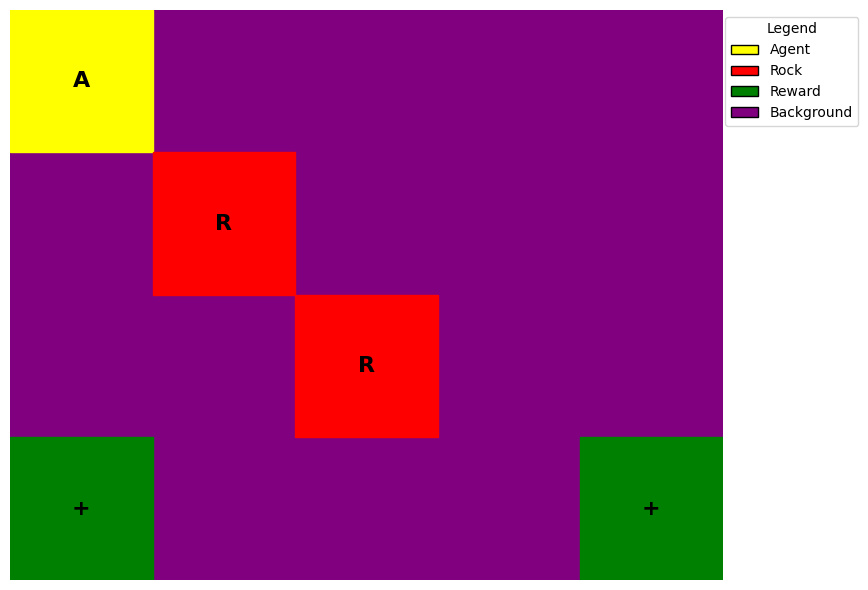

In [2]:

env = LawnMowerEnv()


initial_state = env.reset()
print(f"Initial State: {initial_state}")


env.render()


Starting Improved Random Agent...

Step 1:
Action: 2, State: (0, 0) -> Next State: (1, 0), Reward: -1
Cumulative Reward: -1



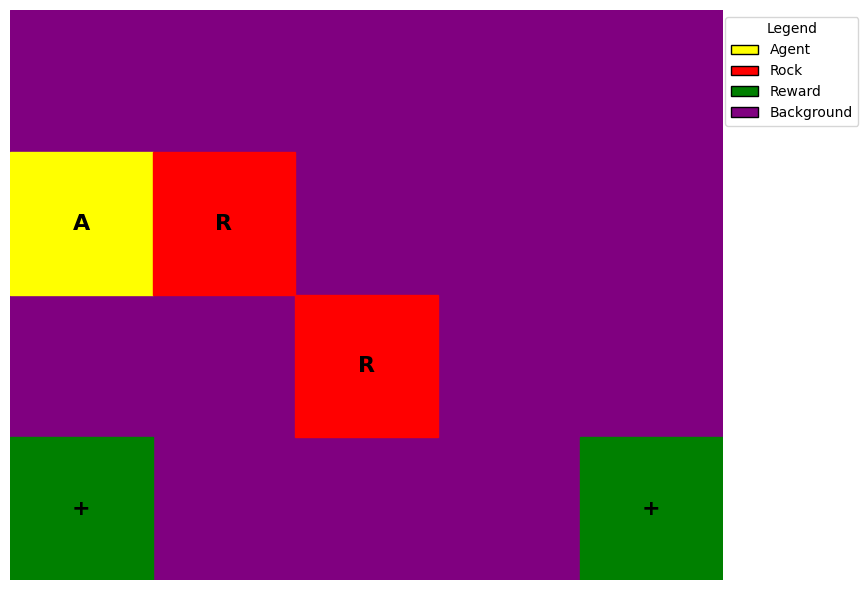

Step 2:
Action: 2, State: (0, 1) -> Next State: (2, 0), Reward: -1
Cumulative Reward: -2



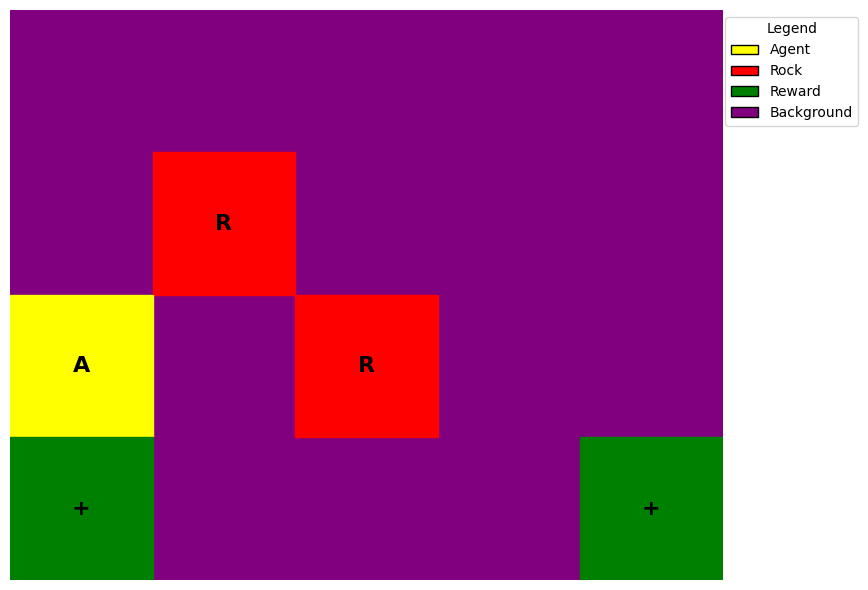

Step 3:
Action: 2, State: (0, 2) -> Next State: (3, 0), Reward: 10
Cumulative Reward: 8



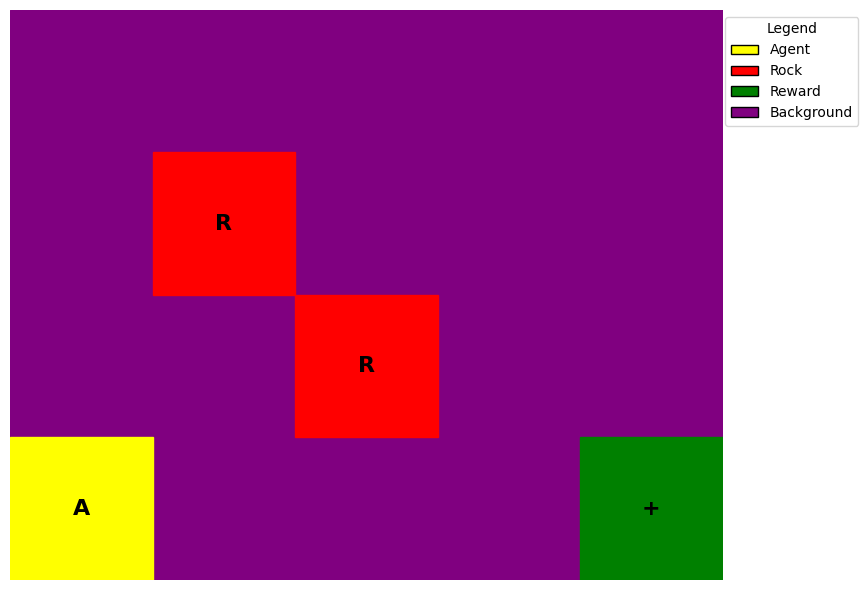

Step 4:
Action: 1, State: (0, 3) -> Next State: (3, 1), Reward: -1
Cumulative Reward: 7



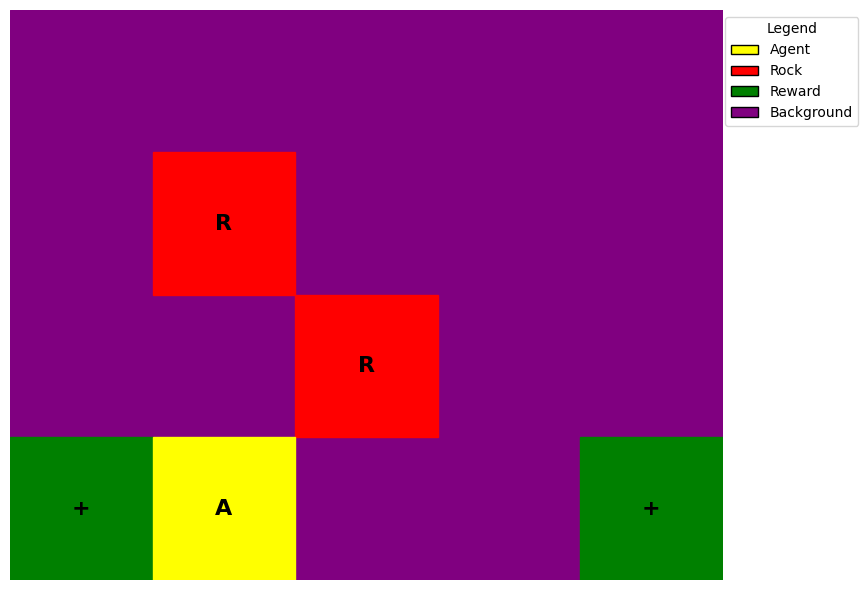

Step 5:
Action: 1, State: (1, 3) -> Next State: (3, 2), Reward: -1
Cumulative Reward: 6



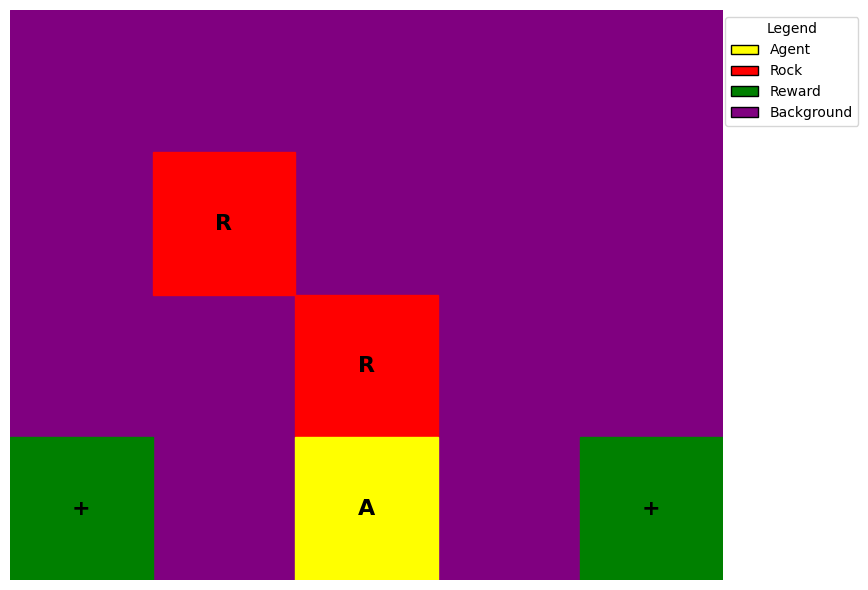

Step 6:
Action: 1, State: (2, 3) -> Next State: (3, 3), Reward: -1
Cumulative Reward: 5



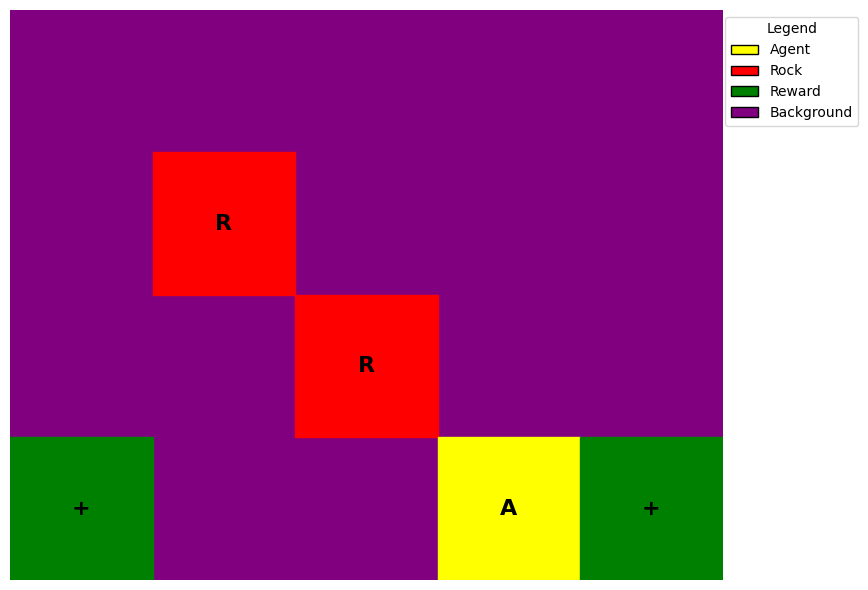

Step 7:
Action: 0, State: (3, 3) -> Next State: (2, 3), Reward: -1
Cumulative Reward: 4



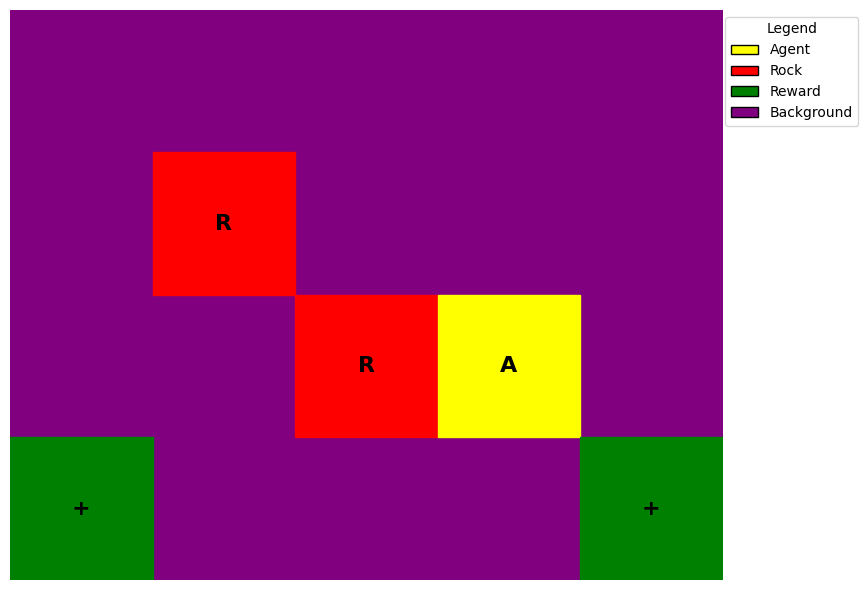

Step 8:
Action: 1, State: (3, 2) -> Next State: (2, 4), Reward: -1
Cumulative Reward: 3



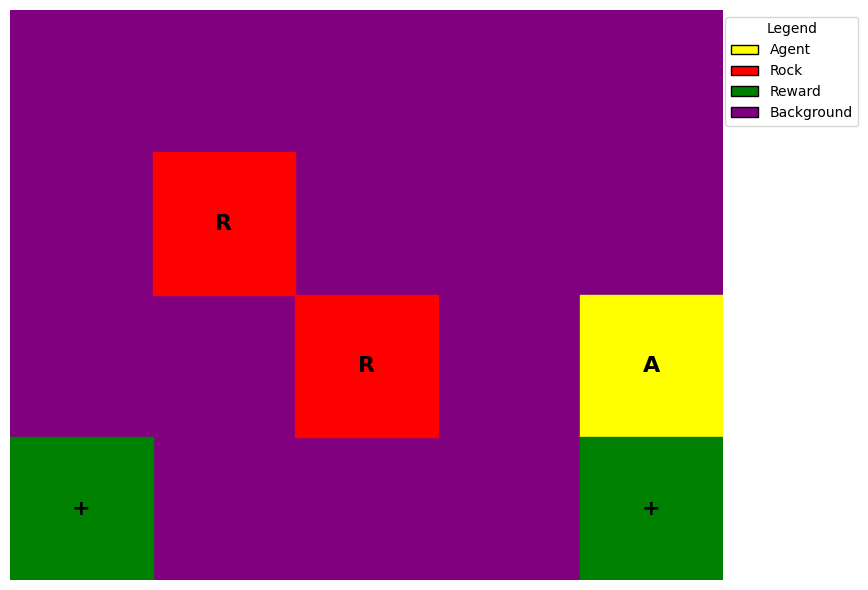

Step 9:
Action: 0, State: (4, 2) -> Next State: (1, 4), Reward: -1
Cumulative Reward: 2



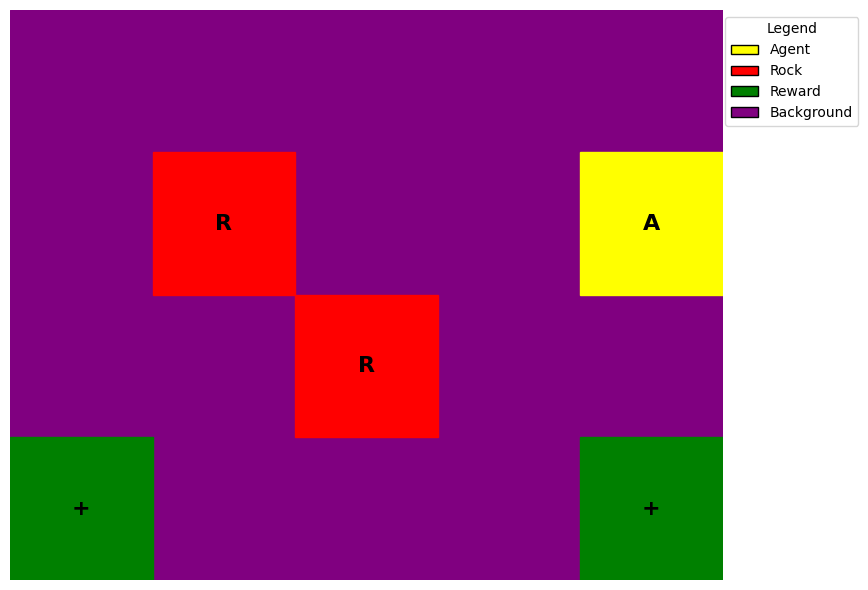

Step 10:
Action: 0, State: (4, 1) -> Next State: (0, 4), Reward: -1
Cumulative Reward: 1



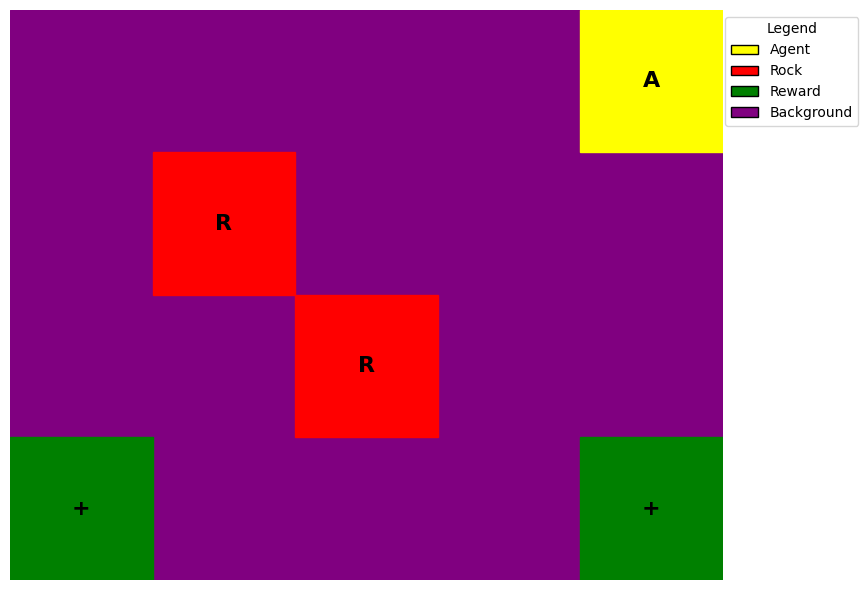


Agent failed to reach the goal within 10 steps.


In [3]:
def improved_random_agent(env, max_steps=10):
    """
    Improved random agent that avoids getting stuck.
    """
    state, _ = env.reset()  
    visited_states = set()  # To keep track of visited states
    cumulative_reward = 0

    print("Starting Improved Random Agent...\n")

    for step in range(1, max_steps + 1):
        x, y = state 

       
        possible_actions = list(range(env.action_space.n))  
        unvisited_actions = []

        for action in possible_actions:
            # Simulate the action to determine the next state
            if action == 0 and (max(0, x - 1), y) not in visited_states:  # Up
                unvisited_actions.append(action)
            elif action == 1 and (x, min(env.grid_size[1] - 1, y + 1)) not in visited_states:  
                unvisited_actions.append(action)
            elif action == 2 and (min(env.grid_size[0] - 1, x + 1), y) not in visited_states:  
                unvisited_actions.append(action)
            elif action == 3 and (x, max(0, y - 1)) not in visited_states:  # Left
                unvisited_actions.append(action)

        
        if unvisited_actions:
            action = np.random.choice(unvisited_actions)
        else:
            action = np.random.choice(possible_actions)  # Fall back to any action if stuck

       
        next_state, reward, terminated, truncated, _ = env.step(action)

       
        visited_states.add(next_state)
        cumulative_reward += reward

        
        print(f"Step {step}:")
        print(f"Action: {action}, State: ({state[1]}, {state[0]}) -> Next State: ({next_state[0]}, {next_state[1]}), Reward: {reward}")
        print(f"Cumulative Reward: {cumulative_reward}\n")

        
        env.render()

        
        if terminated:  # Goal reached
            print(f"Goal reached in {step} steps with cumulative reward: {cumulative_reward}")
            break

        
        state = next_state

    if not terminated:
        print(f"\nAgent failed to reach the goal within {max_steps} steps.")

improved_random_agent(env)


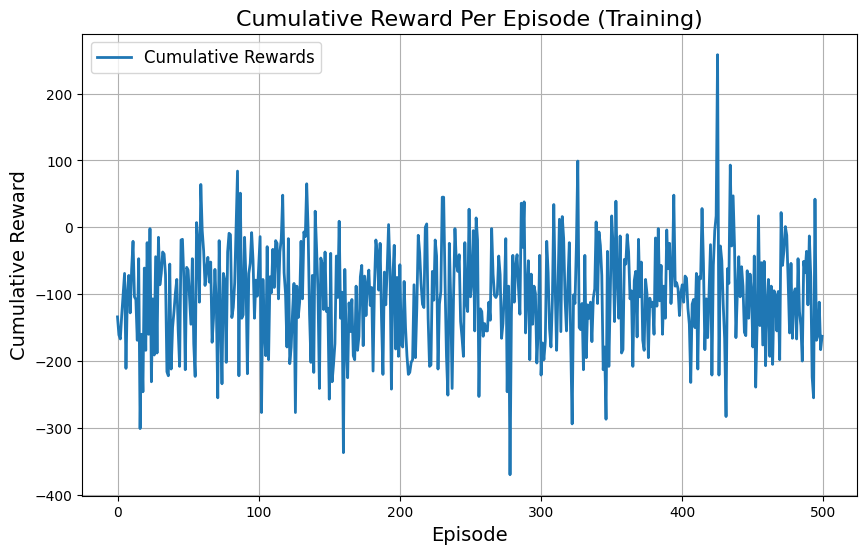

In [4]:
def simulate_cumulative_rewards(env, episodes=500, max_steps=50):
   
    cumulative_rewards = []

    for episode in range(episodes):
        state, _ = env.reset()  
        total_reward = 0
        terminated = False
        truncated = False

        for _ in range(max_steps):
            action = np.random.choice(env.action_space.n)  # Random action
            next_state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward

            # Stop if the episode ends
            if terminated or truncated:
                break

        cumulative_rewards.append(total_reward)

    return cumulative_rewards


env = LawnMowerEnv()  # Ensure the environment is instantiated
cumulative_rewards = simulate_cumulative_rewards(env)

# Plot cumulative rewards per episode
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, linewidth=2, label="Cumulative Rewards")
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Cumulative Reward', fontsize=14)
plt.title('Cumulative Reward Per Episode (Training)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


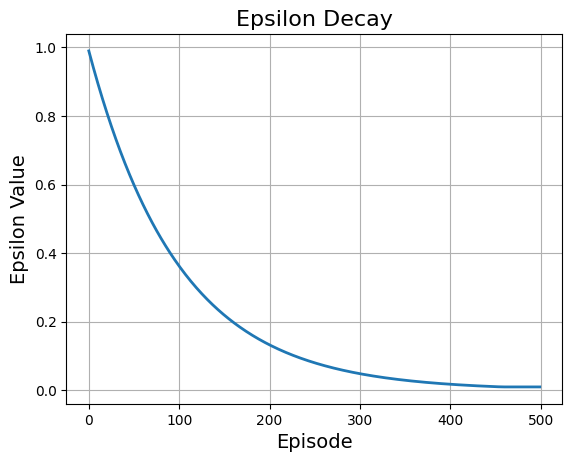

In [5]:

def simulate_epsilon_decay(start_epsilon=1.0, min_epsilon=0.01, decay_rate=0.01, episodes=500):
    epsilon_values = []

    epsilon = start_epsilon
    for episode in range(episodes):
        epsilon = max(min_epsilon, epsilon * (1 - decay_rate))  
        epsilon_values.append(epsilon)

    return epsilon_values


epsilon_values = simulate_epsilon_decay()

# Plot epsilon decay
plt.figure()
plt.plot(epsilon_values, linewidth=2)
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Epsilon Value', fontsize=14)
plt.title('Epsilon Decay', fontsize=16)
plt.grid(True)
plt.show()


In [6]:
# Part 2 

In [7]:

env1 = LawnMowerEnv()

In [8]:
class SARSA_Agent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1):
       
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_decay = epsilon_decay  # Epsilon decay rate
        self.epsilon_min = epsilon_min  # Minimum epsilon
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))  # Q-table

    def state_to_index(self, state):
       
        x, y = state
        return x * self.env.grid_size[1] + y  # Convert 2D (x, y) to 1D index

    def choose_action(self, state):
        
        state_idx = self.state_to_index(state)  # Convert state to index
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.action_space.n)  # Explore
        return np.argmax(self.q_table[state_idx])  # Exploit

    def train(self, episodes=500, max_steps=50):
        
        total_rewards = []
        epsilon_values = []

        for episode in range(episodes):
            # Reset the environment
            state, _ = self.env.reset()
            action = self.choose_action(state)
            total_reward = 0

            for _ in range(max_steps):
               
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                next_action = self.choose_action(next_state)

                
                state_idx = self.state_to_index(state)
                next_state_idx = self.state_to_index(next_state)

                
                self.q_table[state_idx, action] += self.alpha * (
                    reward
                    + self.gamma * self.q_table[next_state_idx, next_action]
                    - self.q_table[state_idx, action]
                )

               
                state, action = next_state, next_action
                total_reward += reward

                if terminated or truncated:
                    break

            
            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)

            
            total_rewards.append(total_reward)
            epsilon_values.append(self.epsilon)

        return total_rewards, epsilon_values

    def evaluate_policy(self, episodes=10, max_steps=50):
        
        greedy_rewards = []

        for episode in range(episodes):
            state, _ = self.env.reset()  # Reset environment
            total_reward = 0

            for _ in range(max_steps):
                # Always choose the best action (greedy policy)
                state_idx = self.state_to_index(state)
                action = np.argmax(self.q_table[state_idx])
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                total_reward += reward

                if terminated or truncated:
                    break

                state = next_state

            greedy_rewards.append(total_reward)

        return greedy_rewards


In [9]:
env1 = LawnMowerEnv()
agent = SARSA_Agent(env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1)
total_rewards, epsilon_values = agent.train(episodes=500, max_steps=50)


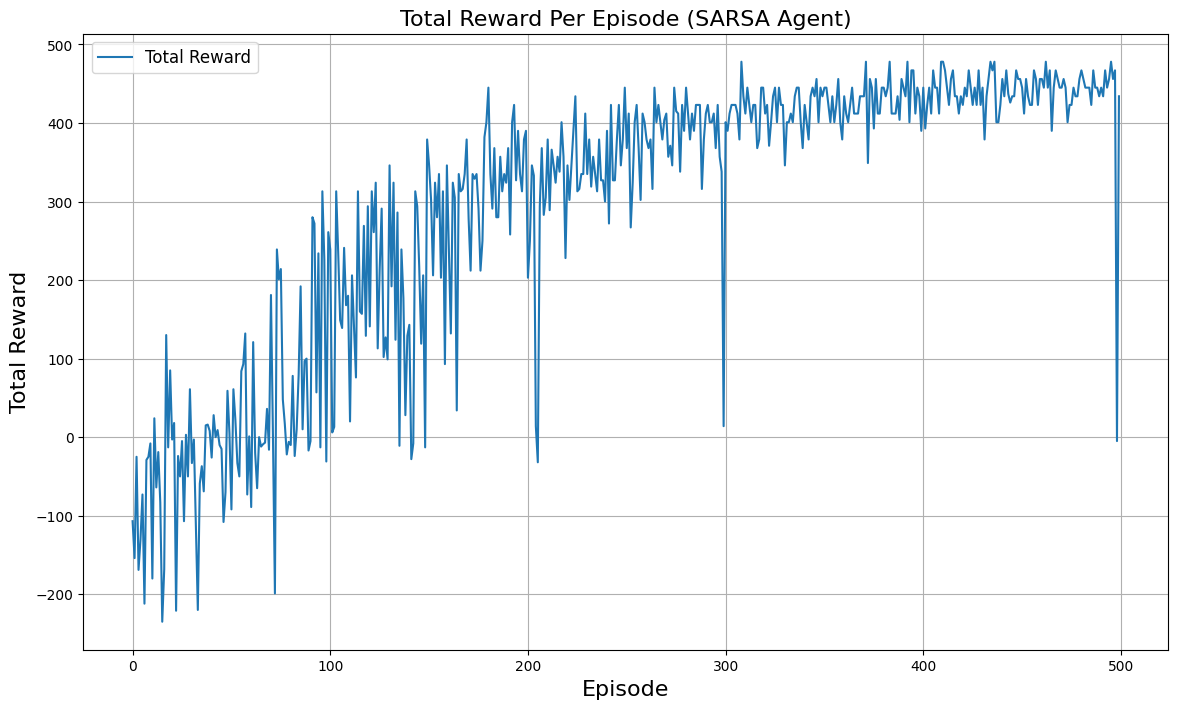

In [10]:
plt.figure(figsize=(14, 8))
plt.plot(total_rewards, label="Total Reward")
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)
plt.title("Total Reward Per Episode (SARSA Agent)", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

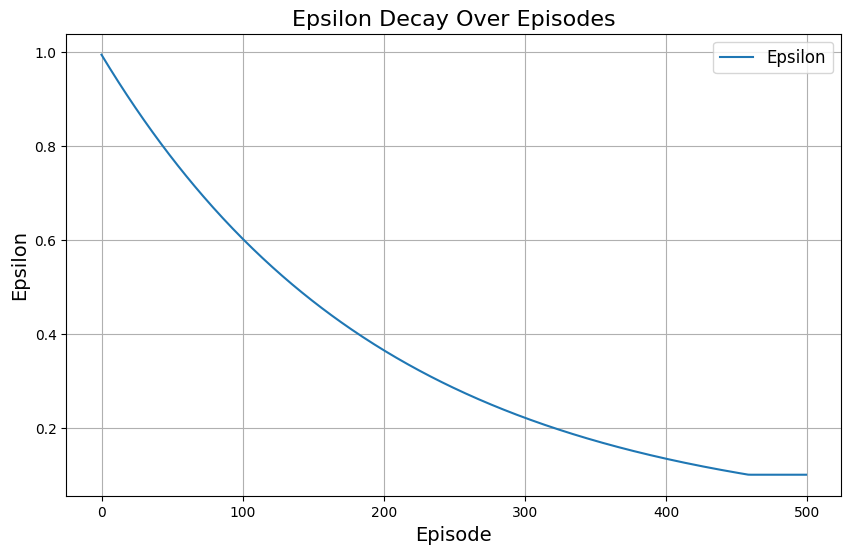

In [11]:

plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, label="Epsilon")
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Epsilon", fontsize=14)
plt.title("Epsilon Decay Over Episodes", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


In [12]:
print("Trained Q-Table:")
print(agent.q_table)


Trained Q-Table:
[[ 2.43686309e+02  1.03382328e+02  5.63713372e+02  1.66144773e+02]
 [ 8.07642697e+00 -5.67430008e+00  7.01398453e+00  2.81042488e+02]
 [-5.66685834e+00 -2.87252555e+00 -1.09013921e+01 -5.37874163e+00]
 [-2.58997949e+00 -1.52146226e+00 -2.26575720e+00 -3.60826290e+00]
 [-1.04848347e+00 -1.67795146e+00  8.47157126e-01 -2.43640351e+00]
 [ 2.25445107e+02  1.51163743e+02  6.20495119e+02  3.51814836e+02]
 [-2.49743851e-01 -5.08922309e+00  4.12820013e+01  3.41429098e+02]
 [-5.20330486e+00 -1.08135798e+00 -2.36776266e+01 -1.87126272e+01]
 [-2.58576744e+00  4.32654880e+00 -1.34999625e+00 -1.02193834e+01]
 [-1.54195980e+00 -2.21411857e-01  1.30787628e+01 -2.47950332e+00]
 [ 4.51673218e+02  3.17668084e+02  6.85776866e+02  5.21594280e+02]
 [ 2.39186959e+01 -1.81610223e+01  2.34440108e+02  5.13253510e+02]
 [-7.92475626e+00 -1.76412974e+00  5.34874525e+01  2.64322115e+00]
 [-1.79029744e+00  4.61353417e+00  7.04845013e+00 -2.19409771e+01]
 [ 8.14313419e-01  4.96125592e+00  1.97043823

In [13]:
# Define hyperparameter values
alpha_values = [0.1, 0.5, 0.9]
gamma_values = [0.8, 0.9, 0.99]

# Variables to track the best model
best_avg_reward = float('-inf')
best_params = None
best_agent = None
best_total_rewards = None
best_epsilon_values = None

# Perform hyperparameter tuning
for alpha in alpha_values:
    for gamma in gamma_values:
        # Initialize SARSA agent
        env2 = LawnMowerEnv()
        agent = SARSA_Agent(env2, alpha=alpha, gamma=gamma, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.1)
        total_rewards, epsilon_values = agent.train(episodes=500, max_steps=50)

        
        greedy_rewards = agent.evaluate_policy(episodes=10, max_steps=50)
        avg_reward = np.mean(greedy_rewards)

       
        if avg_reward > best_avg_reward:
            best_avg_reward = avg_reward
            best_params = (alpha, gamma)
            best_agent = agent
            best_total_rewards = total_rewards
            best_epsilon_values = epsilon_values


print(f"Best Hyperparameters: Alpha={best_params[0]}, Gamma={best_params[1]}")
print(f"Best Average Reward: {best_avg_reward}")


Best Hyperparameters: Alpha=0.1, Gamma=0.8
Best Average Reward: 478.0


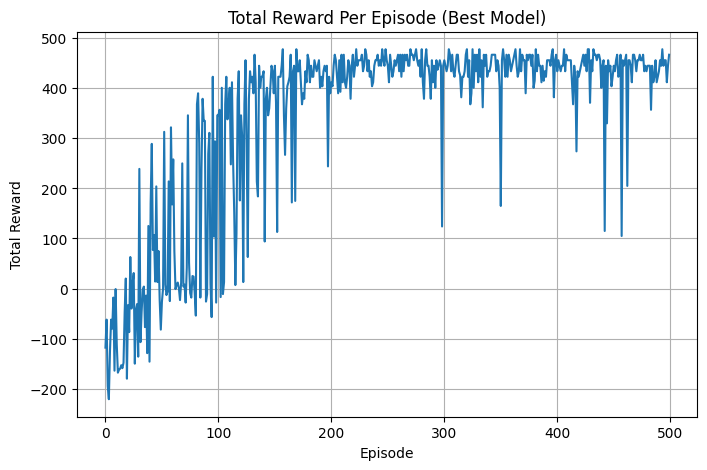

In [14]:

plt.figure(figsize=(8, 5))
plt.plot(range(len(best_total_rewards)), best_total_rewards)
plt.title('Total Reward Per Episode (Best Model)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

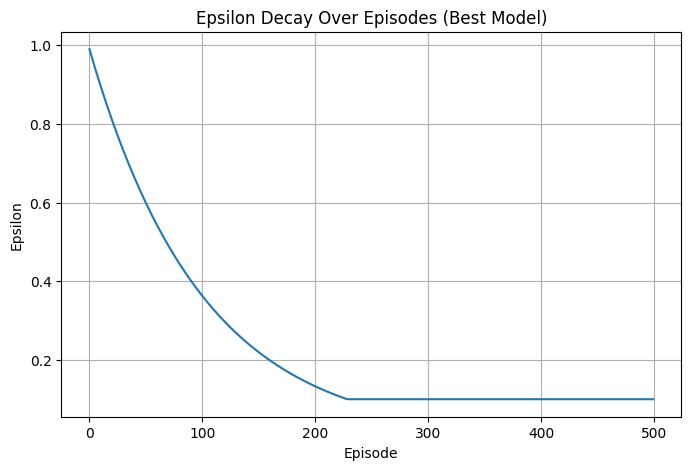

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(best_epsilon_values)), best_epsilon_values)
plt.title('Epsilon Decay Over Episodes (Best Model)')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.grid(True)
plt.show()


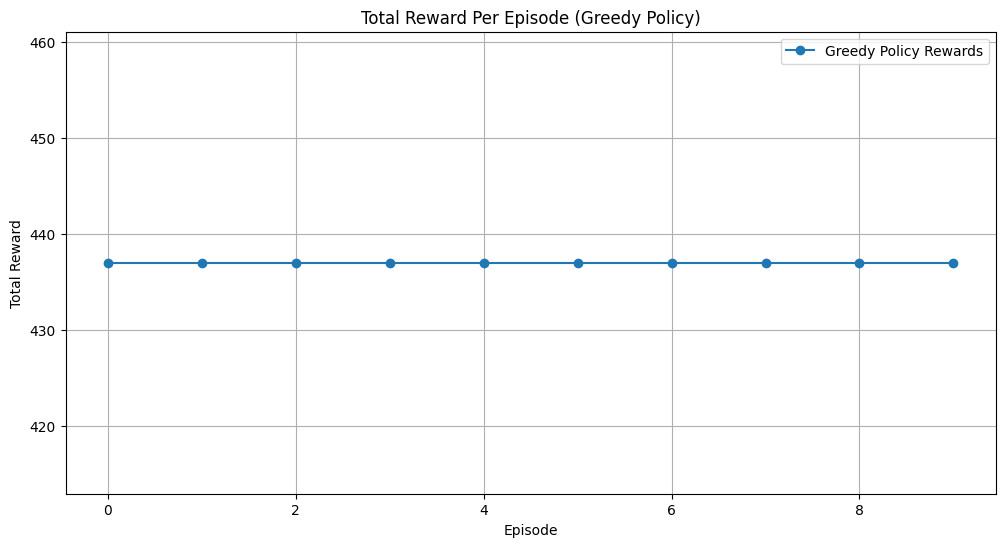

In [16]:
greedy_rewards = agent.evaluate_policy(episodes=10, max_steps=50)
plt.figure(figsize=(12, 6))
plt.plot(greedy_rewards, label="Greedy Policy Rewards", marker='o')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward Per Episode (Greedy Policy)")
plt.legend()
plt.grid(True)
plt.show()

Influence of hyper-parameters on the performance of the agent
Hyper-parameters can hugely affect the performance of SARSA.
1.	Discount Factor (γ): It determines the significance of future rewards. If the value of Discount factor is low, immediate rewards will preferred. Higher values of discount factor give importance to long term rewards but may causes instability.
2.	Epsilon Decay Rate: It defines the speed at which shift from exploration to exploitation occurs. Higher epsilon decay rates make ϵ to reduce instantly by which the agent may miss the important exploration chances and cannot explore the environment completely (insufficient exploration).
3.	Learning Rate (α): It controls the ability of the agent to learn from new experiences. If the value of learning rate is low, learning process will be stable but slow. Higher values of learning rate enables faster learning but instable.
Best Hyper-parameters obtained:
•	Learning rate: 0.1 
•	Gamma (γ): 0.8 
•	Epsilon Decay rate: 0.99
•	Total episodes defined : 500


Part 3

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, deque


class LawnMowerEnv:
    def __init__(self):
        self.action_space = self.ActionSpace(4)  # 4 possible actions
        self.state_space = (5, 5)  # Example: 5x5 grid

    def reset(self):
        return (0, 0)  # Initial state

    def step(self, action):
        next_state = (np.random.randint(5), np.random.randint(5))
        reward = np.random.random()
        done = np.random.random() < 0.1  # Random episode termination
        return next_state, reward, done

    class ActionSpace:
        def __init__(self, n):
            self.n = n

        def sample(self):
            return np.random.randint(self.n)

env = LawnMowerEnv()

In [18]:
gamma_values = [0.9, 0.95, 0.99, 0.999]
epsilon_decay_values = [0.9, 0.95, 0.99, 0.995]
epsilon_min_values = [0.1, 0.05, 0.01]
epsilon_start_values = [1.0, 0.9, 0.8]
num_episodes_values = [500, 1000, 1500]
max_steps_per_episode = 200  # Fixed
alpha = 0.1  # Fixed


np.random.seed(42)
best_config = {}
best_rewards = -float("inf")
tested_configs = []

In [19]:
def epsilon_greedy(Q1, Q2, state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  
    else:
        q_values = Q1[state] + Q2[state]  
        return np.argmax(q_values)  


In [20]:
def run_n_step_double_q(n, gamma, epsilon_start, epsilon_decay, epsilon_min, num_episodes):
    global Q1, Q2
    Q1 = defaultdict(lambda: np.zeros(env.action_space.n))
    Q2 = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = tuple(env.reset())
        done = False
        epsilon = epsilon_start
        states = deque([state], maxlen=n + 1)
        actions = deque()
        rewards = deque()

        episode_rewards = 0

        while not done:
            action = epsilon_greedy(Q1, Q2, state, epsilon)
            next_state, reward, done = env.step(action)
            next_state = tuple(next_state)

           
            states.append(next_state)
            actions.append(action)
            rewards.append(reward)
            episode_rewards += reward

            
            if len(states) == n + 1 or done:
                G = sum(rewards[i] * (gamma ** i) for i in range(len(rewards)))
                update_state = states.popleft()
                update_action = actions.popleft()
                rewards.popleft()

                if np.random.random() < 0.5:
                    max_next_action = np.argmax(Q1[next_state])
                    Q1[update_state][update_action] += alpha * (
                        G + (gamma ** n) * Q2[next_state][max_next_action]
                        - Q1[update_state][update_action]
                    )
                else:
                    max_next_action = np.argmax(Q2[next_state])
                    Q2[update_state][update_action] += alpha * (
                        G + (gamma ** n) * Q1[next_state][max_next_action]
                        - Q2[update_state][update_action]
                    )

            
            state = next_state
            epsilon = max(epsilon_min, epsilon * epsilon_decay)

        rewards_per_episode.append(episode_rewards)

    return rewards_per_episode

In [21]:
def find_best_n(reward_data):
    avg_rewards_per_n = {n: np.mean(rewards) for n, rewards in reward_data.items()}
    optimal_n = max(avg_rewards_per_n, key=avg_rewards_per_n.get)
    max_avg_reward = avg_rewards_per_n[optimal_n]
    return optimal_n, max_avg_reward

In [22]:
def train_q_tables_and_print(n, env, best_config):
    global Q1, Q2
    Q1, Q2 = defaultdict(lambda: np.zeros(env.action_space.n)), defaultdict(lambda: np.zeros(env.action_space.n))
    
    
    print(f"\nInitial Q-Tables for n={n}: Q1 and Q2 are zeroes")
    
    
    print(f"Training for n={n}...")
    rewards = run_n_step_double_q(
        n=n,
        gamma=best_config["gamma"],
        epsilon_start=best_config["epsilon_start"],
        epsilon_decay=best_config["epsilon_decay"],
        epsilon_min=best_config["epsilon_min"],
        num_episodes=best_config["num_episodes"],
    )

    
    print(f"\nTrained Q1 and Q2 Tables for n={n} (first 5 states):")
    for i, (q1_state, q2_state) in enumerate(zip(list(Q1.items())[:5], list(Q2.items())[:5])):
        print(f"State {q1_state[0]}: Q1={q1_state[1]} | Q2={q2_state[1]}")
    return rewards


In [23]:
for gamma in gamma_values:
    for epsilon_decay in epsilon_decay_values:
        for epsilon_min in epsilon_min_values:
            for epsilon_start in epsilon_start_values:
                for num_episodes in num_episodes_values:
                    avg_rewards_all_n = []
                    for n in range(1, 6):
                        rewards = run_n_step_double_q(
                            n=n,
                            gamma=gamma,
                            epsilon_start=epsilon_start,
                            epsilon_decay=epsilon_decay,
                            epsilon_min=epsilon_min,
                            num_episodes=num_episodes
                        )
                        avg_rewards_all_n.append(np.mean(rewards))

                    avg_reward = np.mean(avg_rewards_all_n)
                    tested_configs.append((gamma, epsilon_decay, epsilon_min, epsilon_start, num_episodes, avg_reward))

                    if avg_reward > best_rewards:
                        best_rewards = avg_reward
                        best_config = {
                            "gamma": gamma,
                            "epsilon_decay": epsilon_decay,
                            "epsilon_min": epsilon_min,
                            "epsilon_start": epsilon_start,
                            "num_episodes": num_episodes,
                        }

print("Best Configuration:", best_config)
print("Best Average Reward:", best_rewards)

Best Configuration: {'gamma': 0.95, 'epsilon_decay': 0.995, 'epsilon_min': 0.01, 'epsilon_start': 0.9, 'num_episodes': 500}
Best Average Reward: 5.21152243215915


In [24]:
 def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_smoothed_rewards(reward_data, best_config):
    plt.figure(figsize=(12, 6))
    for n, rewards in reward_data.items():
        smoothed_rewards = moving_average(rewards)
        plt.plot(smoothed_rewards, label=f"n={n}", alpha=0.8, linewidth=2)
    plt.title("Total Rewards per Episode for Different n-Values")
    plt.xlabel("Episode ")
    plt.ylabel("Total Rewards")
    plt.legend(title="n-Step Values")
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

reward_data = {}
for n in range(1, 6):
    rewards = train_q_tables_and_print(n, env, best_config)
    reward_data[n] = rewards

optimal_n, max_avg_reward = find_best_n(reward_data)
print(f"\nOptimal n-step value: n={optimal_n} with Average Reward={max_avg_reward:.2f}")



Initial Q-Tables for n=1: Q1 and Q2 are zeroes
Training for n=1...

Trained Q1 and Q2 Tables for n=1 (first 5 states):
State (1, 0): Q1=[1.58292023 1.29424671 1.33135808 1.32211348] | Q2=[1.17894966 1.25539105 1.22691132 1.05144883]
State (0, 0): Q1=[1.64282041 1.70477269 1.82317897 1.64849874] | Q2=[1.23556082 1.32540269 1.44460158 1.24730703]
State (1, 2): Q1=[1.34451122 1.21080722 1.53448609 1.10865019] | Q2=[1.6621218  1.71078636 1.68700327 1.65939053]
State (4, 0): Q1=[1.22792804 1.04124681 1.46352001 0.96332573] | Q2=[1.41269356 1.38214995 1.46587107 1.5221465 ]
State (2, 4): Q1=[1.23159062 1.38226848 1.47295707 1.21808183] | Q2=[1.39170629 1.27909883 1.45019905 1.2608169 ]

Initial Q-Tables for n=2: Q1 and Q2 are zeroes
Training for n=2...

Trained Q1 and Q2 Tables for n=2 (first 5 states):
State (2, 1): Q1=[2.2120838  2.1965457  1.81518432 1.82598277] | Q2=[1.82255328 1.20147544 2.06580051 1.07328478]
State (0, 0): Q1=[2.82489205 2.6831131  2.59982337 2.53571739] | Q2=[2.24327

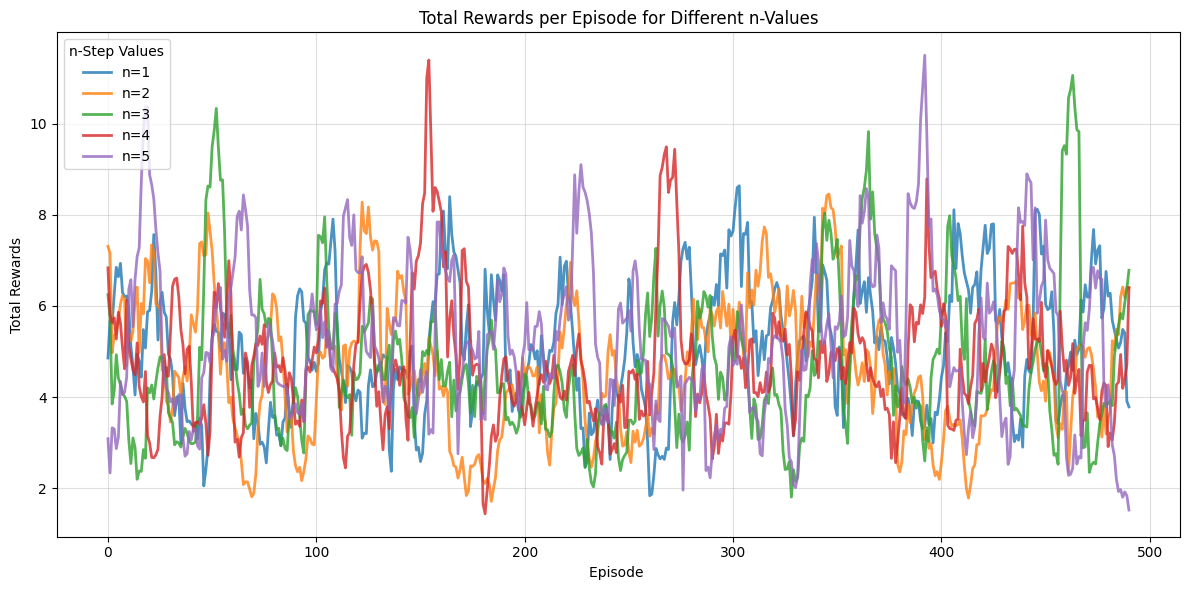

In [25]:
plot_smoothed_rewards(reward_data, best_config)


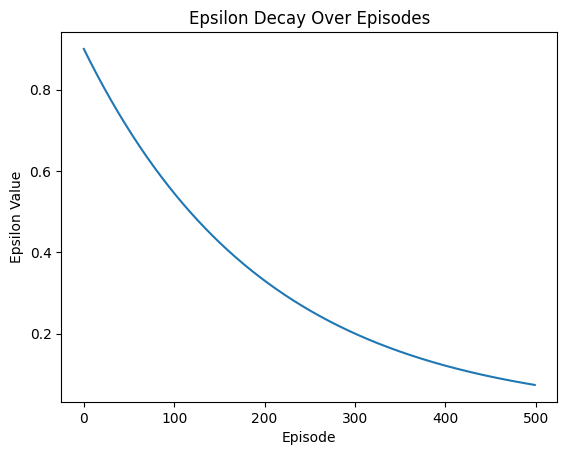

In [26]:

plt.plot([best_config["epsilon_start"] * (best_config["epsilon_decay"] ** i) for i in range(best_config["num_episodes"])])
plt.title("Epsilon Decay Over Episodes")
plt.xlabel("Episode")
plt.ylabel("Epsilon Value")
plt.show()



Running Greedy Policy for n=1
Episode 1: Total Reward = 3.1803477337006445
Episode 2: Total Reward = 4.030169384796102
Episode 3: Total Reward = 1.2843218005543178
Episode 4: Total Reward = 0.9850125268773725
Episode 5: Total Reward = 5.882337741990828
Episode 6: Total Reward = 0.2625098119567173
Episode 7: Total Reward = 1.944045191869387
Episode 8: Total Reward = 1.8318508732670185
Episode 9: Total Reward = 0.7847923113191969
Episode 10: Total Reward = 23.835189919497573

Running Greedy Policy for n=2
Episode 1: Total Reward = 1.251518036252367
Episode 2: Total Reward = 1.353166179206364
Episode 3: Total Reward = 0.9305470852506547
Episode 4: Total Reward = 2.889637328954559
Episode 5: Total Reward = 2.4752024947952043
Episode 6: Total Reward = 3.9910164673204127
Episode 7: Total Reward = 5.164848496732076
Episode 8: Total Reward = 19.602140337709404
Episode 9: Total Reward = 8.569234882046857
Episode 10: Total Reward = 0.7001575466484129

Running Greedy Policy for n=3
Episode 1: To

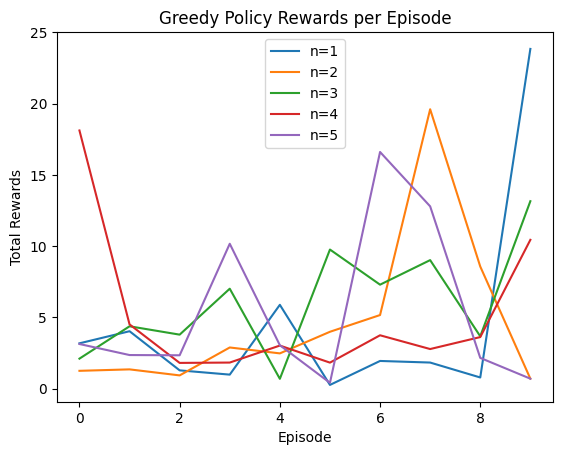

In [27]:

def evaluate_greedy_policy(env, n, Q1, Q2):
    print(f"\nRunning Greedy Policy for n={n}")
    rewards = []
    for episode in range(10):
        state = tuple(env.reset())
        done, total_reward = False, 0
        while not done:
            action = np.argmax(Q1[state] + Q2[state])
            state, reward, done = env.step(action)
            state, total_reward = tuple(state), total_reward + reward
        rewards.append(total_reward)
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")
    return rewards

for n in range(1, 6):
    greedy_rewards = evaluate_greedy_policy(env, n, Q1, Q2)
    plt.plot(greedy_rewards, label=f"n={n}")
plt.title("Greedy Policy Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Rewards")
plt.legend()
plt.show()